# Fashion MNIST - A Marketing stunt by Zolando

Source: 

https://www.kaggle.com/girishgupta/fashion-mnist-using-resnet

![resnet](https://www.researchgate.net/publication/322621180/figure/fig2/AS:584852684410885@1516451154473/The-representation-of-model-architecture-image-for-ResNet-152-VGG-19-and-two-layered.png)

In [3]:
%%capture install_pandas

!pip install pandas

In [4]:
import tensorflow
from tensorflow import keras

In [7]:
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import MaxPooling2D, AveragePooling2D, Input, Flatten
from tensorflow.keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

from keras import backend as K
from keras.models import Model

In [8]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
train_data = pd.read_csv("./data/fashion-mnist_train.csv")
test_data = pd.read_csv("./data/fashion-mnist_test.csv")

In [11]:
X_train = train_data.iloc[:,1:].values
Y_train = train_data.label.values

X_test = test_data.iloc[:,1:].values
Y_test = test_data.label.values

print(X_test.shape, X_train.shape)

(10000, 784) (60000, 784)


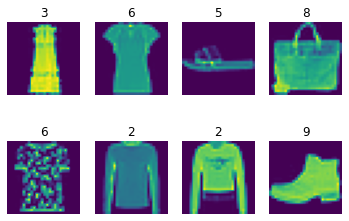

In [13]:
sample = np.random.randint(0,high= 59999, size=8)

sample_img = X_train[sample, :]
sample_label = Y_train[sample]
for i , img in enumerate(sample_img):
    plt.subplot(2,4,i+1)
    plt.axis("off")
    plt.title(sample_label[i])
    img = img.reshape(28,28)
    plt.imshow(img)
plt.show()

In [14]:
#Defining constants
epochs = 3
batch_size = 512
img_size = 28

num_classes = 10

num_filters = 16
num_blocks = 3
num_sub_blocks = 2

use_max_pool = False